In [41]:
import numpy as np
import pandas as pd
import seaborn as sb
import os

In [42]:
url = '/content/soccer21-22.csv'
df= pd.read_csv(url)
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


End of season results

In [43]:
table = pd.DataFrame(df.HomeTeam.unique(),columns=["Team"])
table[['Played', 'Win', 'Draw', 'Loss', 'GF', 'GA', 'GD' , 'Points']] = 0
table

,Team,Played,Win,Draw,Loss,GF,GA,GD,Points
0,Brentford,0,0,0,0,0,0,0,0
1,Man United,0,0,0,0,0,0,0,0
2,Burnley,0,0,0,0,0,0,0,0
3,Chelsea,0,0,0,0,0,0,0,0
4,Everton,0,0,0,0,0,0,0,0
5,Leicester,0,0,0,0,0,0,0,0
6,Watford,0,0,0,0,0,0,0,0
7,Norwich,0,0,0,0,0,0,0,0
8,Newcastle,0,0,0,0,0,0,0,0
9,Tottenham,0,0,0,0,0,0,0,0


In [44]:
table = table.set_index('Team')

In [45]:
for i in df.index:
    home = df.HomeTeam.loc[i]
    away = df.AwayTeam.loc[i]
    table.loc[home,'Played'] += 1
    table.loc[away,'Played'] += 1
    table.loc[home,'GF'] += df.FTHG.loc[i]
    table.loc[away,'GF'] += df.FTAG.loc[i]
    table.loc[home,'GA'] += df.FTAG.loc[i]
    table.loc[away,'GA'] += df.FTHG.loc[i]
    if df.loc[i,'FTR'] == "H":
        table.loc[home,'Win'] += 1
        table.loc[away,'Loss'] += 1
    elif df.loc[i,'FTR'] == "A":
        table.loc[away,'Win'] += 1
        table.loc[home,'Loss'] += 1
    else:
        table.loc[away,'Draw'] += 1
        table.loc[home,'Draw'] += 1
table['Points'] = 3*table['Win'] + table['Draw']
table['GD'] = table['GF'] - table['GA']

In [46]:
table = table.sort_values(by = 'Points', ascending=False)
table = table.reset_index()
table

,Team,Played,Win,Draw,Loss,GF,GA,GD,Points
0,Man City,38,29,6,3,99,26,73,93
1,Liverpool,38,28,8,2,94,26,68,92
2,Chelsea,38,21,11,6,76,33,43,74
3,Tottenham,38,22,5,11,69,40,29,71
4,Arsenal,38,22,3,13,61,48,13,69
5,Man United,38,16,10,12,57,57,0,58
6,West Ham,38,16,8,14,60,51,9,56
7,Leicester,38,14,10,14,62,59,3,52
8,Brighton,38,12,15,11,42,44,-2,51
9,Wolves,38,15,6,17,38,43,-5,51


# **Explore: Which team committed the most fouls?**

In [47]:
teams= pd.DataFrame(df.HomeTeam.unique(),columns=["Team"])
teams[['Away_Foul','Home_Foul','Total_Foul']] = 0
teams = teams.set_index("Team")
teams

,Away_Foul,Home_Foul,Total_Foul
Team,,,
Brentford,0,0,0
Man United,0,0,0
Burnley,0,0,0
Chelsea,0,0,0
Everton,0,0,0
Leicester,0,0,0
Watford,0,0,0
Norwich,0,0,0
Newcastle,0,0,0


In [48]:
for i in df.index:
  home = df.HomeTeam.loc[i]
  away = df.AwayTeam.loc[i]
  teams.loc[home,'Home_Foul'] += df.HF.loc[i]
  teams.loc[away,'Away_Foul'] += df.AF.loc[i]
teams['Total_Foul'] = teams['Away_Foul'] + teams['Home_Foul']

In [31]:
teams = teams.sort_values(by='Total_Foul',ascending=False)
teams.reset_index()

,Team,Away_Foul,Home_Foul,Total_Foul
0,Leeds,233,236,469
1,Watford,225,215,440
2,Crystal Palace,205,210,415
3,Chelsea,196,213,409
4,Southampton,196,206,402
5,Aston Villa,211,190,401
6,Man United,226,169,395
7,Burnley,193,201,394
8,Brighton,185,208,393
9,Newcastle,182,209,391


# ***Visualize: Plot the percentage of games that ended in a draw over time. ***

In [32]:
Percent = table['Draw']/table['Played'] *100
per = pd.DataFrame(Percent)
per.columns = ['Draw_Percentage']

In [51]:
per2 = table.loc[:,['Team', 'Draw']]
per_df = pd.concat([per2,per], axis =1)
per_df = per_df.set_index('Team')

In [52]:
per_df = per_df.sort_values(by= 'Draw_Percentage', ascending= False)
per_df = per_df.reset_index()
per_df

,Team,Draw,Draw_Percentage
0,Brighton,15,39.473684
1,Crystal Palace,15,39.473684
2,Burnley,14,36.842105
3,Southampton,13,34.210526
4,Chelsea,11,28.947368
5,Leeds,11,28.947368
6,Newcastle,10,26.315789
7,Man United,10,26.315789
8,Leicester,10,26.315789
9,West Ham,8,21.052632


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

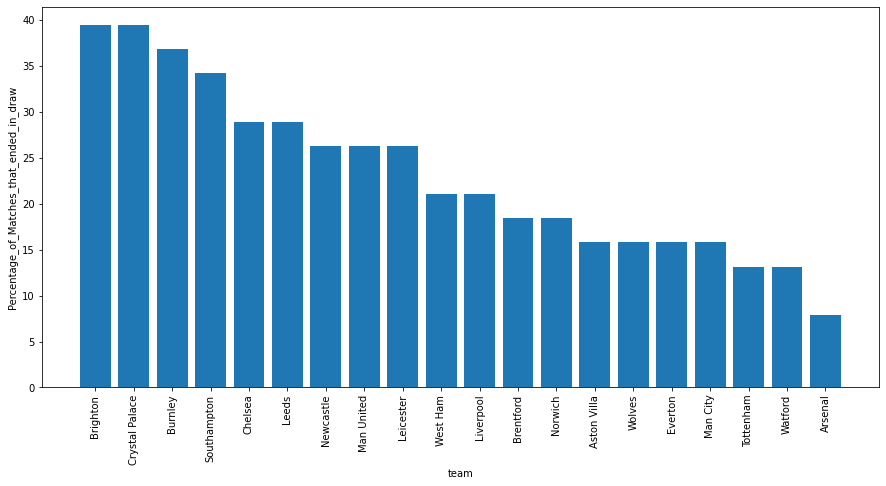

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
#plt.subplot(131)
plt.bar(per_df.Team, per_df.Draw_Percentage)
plt.xlabel('team')
plt.ylabel('Percentage_of_Matches_that_ended_in_draw')
plt.xticks(rotation='vertical')